<a href="https://colab.research.google.com/github/DarshanSuresh/Machine-Learning/blob/main/ML_LAB_04_23_August_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVC, K-FOLD, Sensitivity Analysis, Ideal Test Condition, ROC/AUC

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('/content/cars_dataset.csv')
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df['car'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

<Axes: >

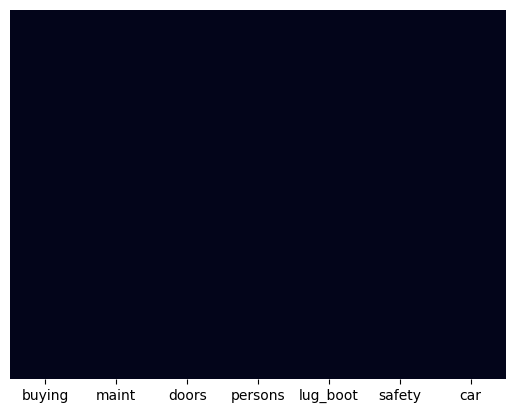

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc


In [ ]:
df['car'] = df['car'].astype('category')
df['car'] = df['car'].cat.codes

df['buying'] = df['buying'].astype('category')
df['buying'] = df['buying'].cat.codes

df['maint'] = df['maint'].astype('category')
df['maint'] = df['maint'].cat.codes

df['doors'] = df['doors'].astype('category')
df['doors'] = df['doors'].cat.codes

df['persons'] = df['persons'].astype('category')
df['persons'] = df['persons'].cat.codes

df['lug_boot'] = df['lug_boot'].astype('category')
df['lug_boot'] = df['lug_boot'].cat.codes

df['safety'] = df['safety'].astype('category')
df['safety'] = df['safety'].cat.codes

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,3,3,3,2,2,1,2
1,3,3,3,2,2,2,2
2,3,3,3,2,2,0,2
3,3,3,3,2,1,1,2
4,3,3,3,2,1,2,2


In [ ]:
X = df.drop(columns='car')
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,3,2,2,1
1,3,3,3,2,2,2
2,3,3,3,2,2,0
3,3,3,3,2,1,1
4,3,3,3,2,1,2
...,...,...,...,...,...,...
1723,1,1,0,1,1,2
1724,1,1,0,1,1,0
1725,1,1,0,1,0,1
1726,1,1,0,1,0,2


In [ ]:
y = df['car']
y

,car
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21) #30% test size 70:30

In [ ]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1345,0,0,2,1,1,2
300,3,0,1,2,1,1
989,1,0,1,0,0,0
1588,3,3,0,1,1,2
1196,0,3,3,1,0,0
...,...,...,...,...,...,...
368,2,3,1,2,0,0
48,0,0,3,2,1,1
772,0,0,2,0,0,2
1231,2,3,3,1,0,2


In [ ]:
X_test

,buying,maint,doors,persons,lug_boot,safety
1066,0,2,0,0,1,2
1172,3,2,3,1,2,0
213,0,1,2,2,0,1
23,3,2,3,2,1,0
826,2,1,2,0,0,2
...,...,...,...,...,...,...
438,3,3,0,2,0,1
1070,0,2,0,0,0,0
164,3,2,2,2,2,0
1127,1,0,0,0,2,0


In [ ]:
y_train

,car
1345,0
300,2
989,3
1588,2
1196,2
...,...
368,2
48,2
772,0
1231,0


In [ ]:
y_test

,car
1066,0
1172,2
213,2
23,2
826,1
...,...
438,2
1070,0
164,2
1127,0


# Feature Selection


## SelectKBest class to extract top 20 best features selection

In [ ]:
X = df.iloc[:,0:-1]
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,3,2,2,1
1,3,3,3,2,2,2
2,3,3,3,2,2,0
3,3,3,3,2,1,1
4,3,3,3,2,1,2
...,...,...,...,...,...,...
1723,1,1,0,1,1,2
1724,1,1,0,1,1,0
1725,1,1,0,1,0,1
1726,1,1,0,1,0,2


In [ ]:
y = df.iloc[:,-1]
y

,car
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


## Pearson Correlation-Matrix for feature selection


**The value of pearson correlation coefficient is in [-1, 1]**

* -1: negative correlation
* 0: no correlation
* 1: positive correlation


Moreover, it can be viewed as:
1. .00-.19: very weak
1. .20-.39: weak
1. .40-.59: moderate
1. .60-.79: strong
1. .80-1.0: very strong

## Identify and remove Correlated features

In [ ]:
X = df.iloc[:,0:-1]
X
y = df.iloc[:,-1]
y = y.round(2)

In [ ]:
# Threshold for removing correlated variables
threshold = 0.5

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
corr_matrix.head()

,buying,maint,doors,persons,lug_boot,safety
buying,1.000000e+00,1.863222e-17,3.291606e-16,8.914399e-16,1.161291e-17,6.432848e-17
maint,1.863222e-17,1.000000e+00,1.736265e-16,2.273636e-16,5.278595e-18,2.280353e-17
doors,3.291606e-16,1.736265e-16,1.000000e+00,2.925341e-16,3.659826e-18,3.540178e-16
persons,8.914399e-16,2.273636e-16,2.925341e-16,1.000000e+00,2.594533e-16,2.902796e-16
lug_boot,1.161291e-17,5.278595e-18,3.659826e-18,2.594533e-16,1.000000e+00,1.541976e-17


In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper.head()

,buying,maint,doors,persons,lug_boot,safety
buying,NaN,1.863222e-17,3.291606e-16,8.914399e-16,1.161291e-17,6.432848e-17
maint,NaN,NaN,1.736265e-16,2.273636e-16,5.278595e-18,2.280353e-17
doors,NaN,NaN,NaN,2.925341e-16,3.659826e-18,3.540178e-16
persons,NaN,NaN,NaN,NaN,2.594533e-16,2.902796e-16
lug_boot,NaN,NaN,NaN,NaN,NaN,1.541976e-17


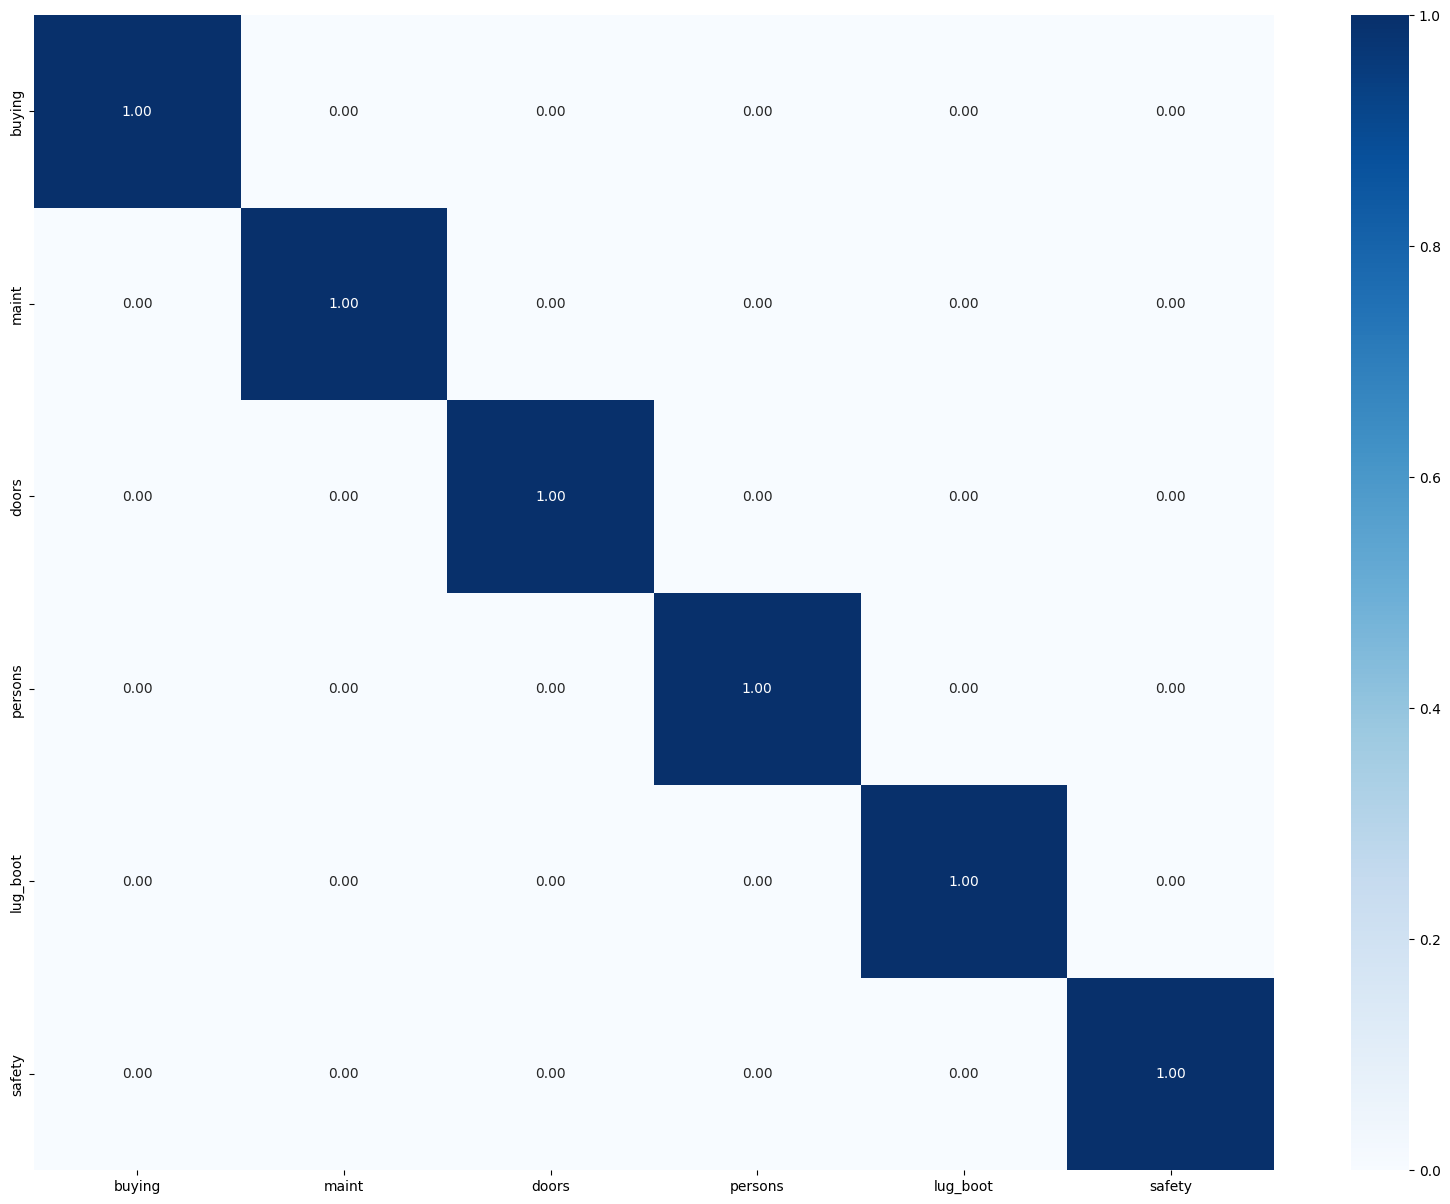

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", ax=ax)
plt.show()

## Model

In [ ]:
from sklearn.svm import SVC
model = SVC(C=7,kernel='poly')
model.fit(X_train,y_train)

SVC(C=7, kernel='poly')

In [ ]:
model.score(X_train,y_train)

0.9230769230769231

In [ ]:
model.score(X_test,y_test)

0.8709055876685935

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model.fit(X_train, y_train)

pred = model.predict(X_test)
matrix = classification_report(y_test, pred)
print(matrix)


              precision    recall  f1-score   support

           0       0.68      0.78      0.73       109
           1       0.93      0.64      0.76        22
           2       0.96      0.91      0.93       370
           3       0.61      0.94      0.74        18

    accuracy                           0.87       519
   macro avg       0.79      0.82      0.79       519
weighted avg       0.89      0.87      0.87       519



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

Text(0.5, 14.722222222222216, 'Actual value')

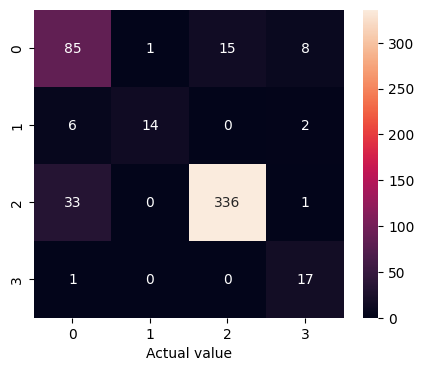

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel('Predicted value')
plt.xlabel('Actual value')

# K-Fold Cross Validation  

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression()

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


# Sensitivity analysis of k-fold cross-validation.

Ideal: 0.840
> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26,

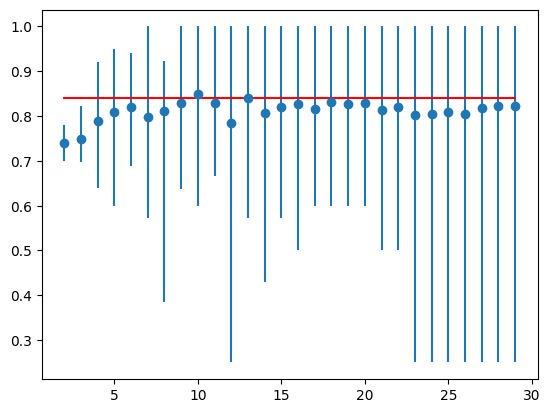

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

def get_model():
	model = LogisticRegression()
	return model

def evaluate_model(cv):
	X, y = get_dataset()
	model = get_model()
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return mean(scores), scores.min(), scores.max()

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

folds = range(2,30)

means, mins, maxs = list(),list(),list()

for k in folds:
	cv = KFold(n_splits=k, shuffle=True, random_state=1)

	k_mean, k_min, k_max = evaluate_model(cv)
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	means.append(k_mean)
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()

# Ideal Test Condition

>LogisticRegression: ideal=0.840, cv=0.850
>RidgeClassifier: ideal=0.830, cv=0.830
>SGDClassifier: ideal=0.760, cv=0.780
>PassiveAggressiveClassifier: ideal=0.720, cv=0.740
>KNeighborsClassifier: ideal=0.760, cv=0.770
>DecisionTreeClassifier: ideal=0.700, cv=0.660
>ExtraTreeClassifier: ideal=0.590, cv=0.690
>LinearSVC: ideal=0.810, cv=0.810
>SVC: ideal=0.900, cv=0.880
>GaussianNB: ideal=0.730, cv=0.720
>AdaBoostClassifier: ideal=0.740, cv=0.740
>BaggingClassifier: ideal=0.800, cv=0.750
>RandomForestClassifier: ideal=0.840, cv=0.770
>ExtraTreesClassifier: ideal=0.820, cv=0.810
>GaussianProcessClassifier: ideal=0.790, cv=0.760
>GradientBoostingClassifier: ideal=0.820, cv=0.820
>LinearDiscriminantAnalysis: ideal=0.830, cv=0.830
>QuadraticDiscriminantAnalysis: ideal=0.760, cv=0.680
Correlation: 0.824


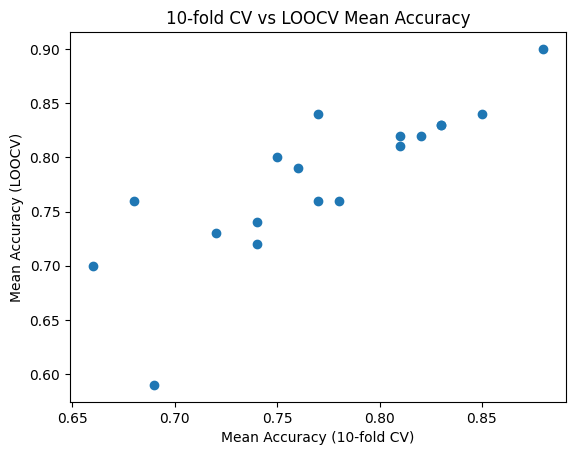

In [ ]:
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def get_dataset(n_samples=100):
	X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y


def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models


def evaluate_model(cv, model):

	X, y = get_dataset()

	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return mean(scores)

ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)

models = get_models()

ideal_results, cv_results = list(), list()


for model in models:

	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)

	if isnan(cv_mean) or isnan(ideal_mean):
		continue

	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)

	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)

pyplot.scatter(cv_results, ideal_results)
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
pyplot.show()

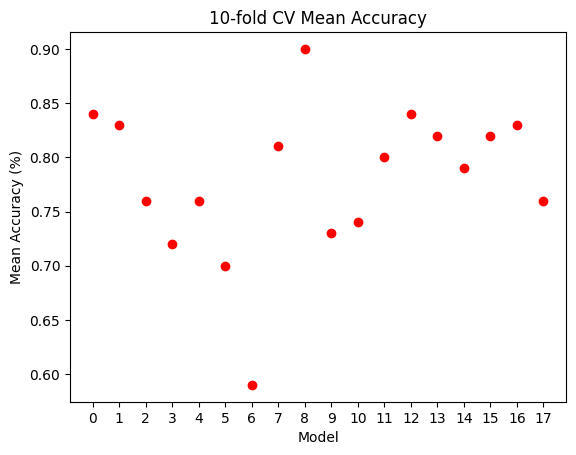

In [ ]:
fig, ax = plt.subplots()

ax.scatter(range(len(cv_results)), ideal_results, color='red')

ax.set_xticks(range(len(cv_results)))

ax.set_title('10-fold CV Mean Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Mean Accuracy (%)')
plt.show()

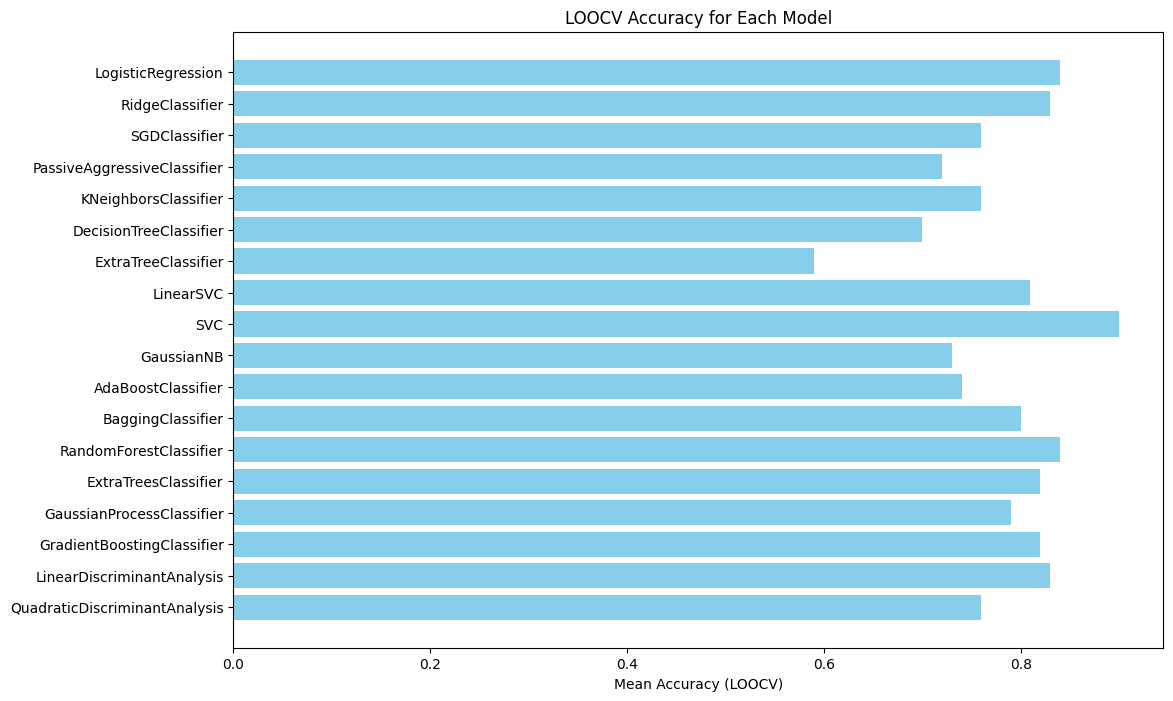

In [ ]:
import matplotlib.pyplot as plt

model_names = [type(model).__name__ for model in models]
ideal_accuracies = ideal_results

plt.figure(figsize=(12, 8))
plt.barh(model_names, ideal_accuracies, color='skyblue')
plt.xlabel('Mean Accuracy (LOOCV)')
plt.title('LOOCV Accuracy for Each Model')
plt.gca().invert_yaxis()
plt.show()


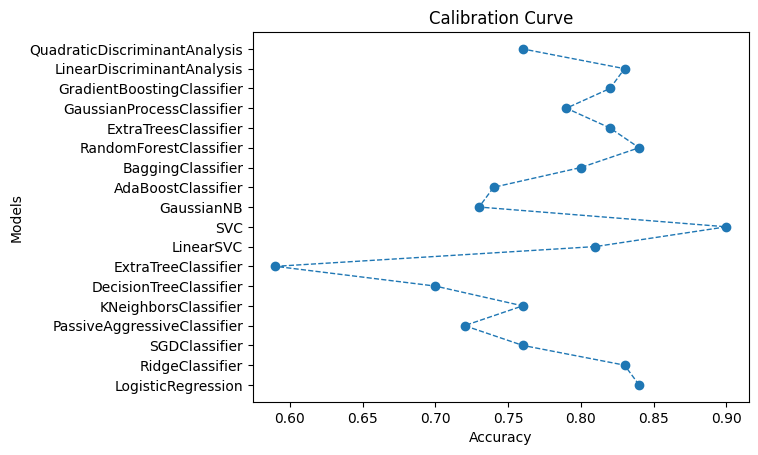

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and their ideal (LOOCV) accuracy results
model_names = [type(model).__name__ for model in models]
ideal_accuracies = ideal_results

plt.plot(ideal_accuracies,
		model_names,
		marker='o',
    linestyle='dashed',
		linewidth=1)

plt.title('Calibration Curve')
plt.xlabel('Accuracy')
plt.ylabel('Models')

# Show the plot
plt.show()


# ROC/AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


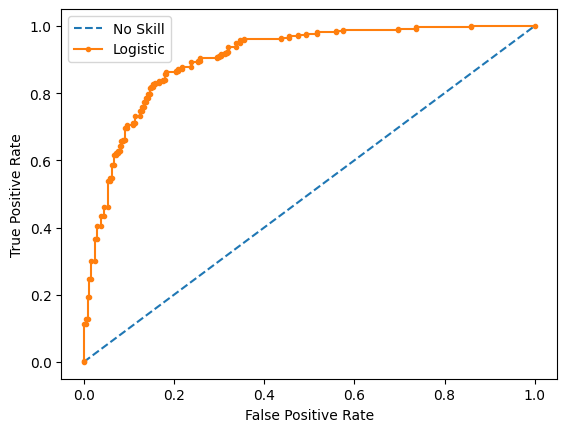

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)


print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()